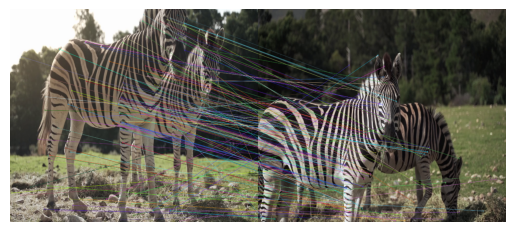

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

video1 = cv.VideoCapture("C:/Users/ragha/Downloads/zebra2.mp4")
video2 = cv.VideoCapture("C:/Users/ragha/Downloads/zebra1.mp4")

while True :
    ret1 , frame1  = video1.read()
    ret2 , frame2 = video2.read()
    if not ret1 :
        break
    if not ret2:
        break
    #frame1 = cv.cvtColor(frame1 , cv.COLOR_BGR2GRAY)
    #frame2 = cv.cvtColor(frame2 , cv.COLOR_BGR2GRAY)
    
    sift = cv.SIFT_create()

    kp1 , des1 = sift.detectAndCompute(frame1 , None)
    kp2 , des2 = sift.detectAndCompute(frame2 , None)
    
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE , trees = 5)
    search_params = dict(checks = 50)

    flann0 = cv.FlannBasedMatcher(index_params , search_params)
    matches0 = flann0.knnMatch(des1 , des2 , 2)
    
    good_matches0 = []
    for m , n in matches0:
        if m.distance < 0.75*n.distance:
            good_matches0.append(m)

    img_match0 = cv.drawMatches(frame1 , kp1 , frame2 , kp2 , good_matches0 , None , flags = 2)
    img_match0 = cv.resize(img_match0 , (1400,600))
    cv.imshow("svs" , img_match0)
    new_image = cv.cvtColor(img_match0 , cv.COLOR_BGR2RGB)
    plt.imshow(new_image )
    plt.axis("OFF")
   

    if cv.waitKey(25) & 0xFF == ord('q'):
        break


video1.release()
video2.release()
cv.destroyAllWindows()    